# The LSTM model
The following demo are mainly cited from [Serafeim Loukas' work](https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-an-lstm-model-d0056cd5e055). 

**Getting the stock price history data**

We use Yahoo website to get the stock price history of Apple.The data are from 2015 till 2020.


# Python working libraries
*libraries needed: Keras, Tensorflow, Pandas, Scikit-Learn & Numpy*

We are going to train a multi-layer LSTM RNN model to predict the last value of a sequence of values of the APPLE stock price in this Demo.
Let’s load the data and exlpore them:

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/assamidanov/LSTM/main/WMT-2-1.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1510, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-30,59.869999,60.060001,58.730000,58.840000,51.444878,14942600
1,2015-12-01,59.130001,59.290001,58.650002,58.990002,51.576015,12204100
2,2015-12-02,58.610001,59.290001,58.320000,58.349998,51.443775,13586900
3,2015-12-03,58.689999,59.660000,58.599998,59.040001,52.052105,15844100
4,2015-12-04,59.049999,59.849998,59.029999,59.660000,52.598724,10435300


The next step is to split the data into training and test sets to avoid overfitting and to be able to generalize our model.

The output value will be the “Close” stock price value.


In [ ]:
training_set = df.iloc[:1282, 4:5].values
test_set = df.iloc[1282:, 4:5].values

It would be better to normalize the data before model fitting. This will boost the performance. 

We will build the input features with time lag of 1 day (lag 1):




In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 1282):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(1272, 60, 1)

The format of the input data goes in this way: #values, #time-steps, #1 dimensional output.

Let's start building the model. LSTM model will have 50 neurons and 4 hidden layers. 

Finally, we will assign 1 neuron in the output layer for predicting the normalized stock price. We will use the MSE loss function and the Adam stochastic gradient descent optimizer.

We need to add return_sequences=True for all LSTM layers except the last one.

Setting this flag to True lets Keras know that LSTM output should contain all historical generated outputs along with time stamps (3D). So, next LSTM layer can work further on the data.

If this flag is false, then LSTM only returns last output (2D). Such output is not good enough for another LSTM layer.

**Note**: The following code will take ~5min.


In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 12s 131ms/step - loss: 0.0232
Epoch 2/100
39/39 [==============================] - 5s 132ms/step - loss: 0.0041
Epoch 3/100
39/39 [==============================] - 5s 128ms/step - loss: 0.0040
Epoch 4/100
39/39 [==============================] - 5s 128ms/step - loss: 0.0033
Epoch 5/100
39/39 [==============================] - 5s 126ms/step - loss: 0.0047
Epoch 6/100
39/39 [==============================] - 5s 130ms/step - loss: 0.0041
Epoch 7/100
39/39 [==============================] - 5s 128ms/step - loss: 0.0037
Epoch 8/100
39/39 [==============================] - 5s 131ms/step - loss: 0.0034
Epoch 9/100
39/39 [==============================] - 5s 131ms/step - loss: 0.0032
Epoch 10/100
39/39 [==============================] - 5s 129ms/step - loss: 0.0030
Epoch 11/100
39/39 [==============================] - 5s 130ms/step - loss: 0.0031
Epoch 12/100
39/39 [==============================] - 5s 128ms/step - loss: 0.0026
Epoch 13/100

Test data:


In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:1282, 1:2]
dataset_test = df.iloc[1282:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 288):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(228, 60, 1)


**Prediction using test data**


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
len(dataset_test)

228

# Results
Visualization of the results using a lag of 1:




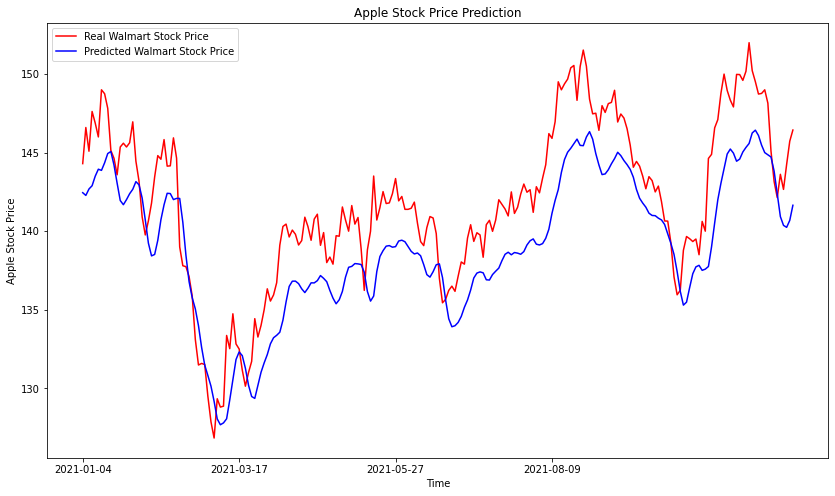

In [ ]:
# Visualising the results
plt.figure(figsize=(14,8))
plt.plot(df.loc[1282:, "Date"],dataset_test.values, color = "red", label = "Real Walmart Stock Price")
plt.plot(df.loc[1282:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Walmart Stock Price")
plt.xticks(np.arange(0,168,50))
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()


In [ ]:
print("Mean square error is ",sum((dataset_test.values-predicted_stock_price)**2)[0])

Mean square error is  2588.703616044753




We can explicitly observe that our model performed well. It is able to follow most of the huge jumps/drops however, for the latest time stamps, we can observe that the model predicted lower values compared to the real values of the stock price.

**The initial selected lag in this article was 1 i.e. using a step of 1 day**. This can be easily changed by altering the code that builds the 3D inputs.
Example: One can change the following 2 blocks of code:

In [ ]:
dataset_test.values




# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 40 time-steps and 1 output
X_train = []
y_train = []
for i in range(40, 1282):
    X_train.append(training_set_scaled[i-40:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 50, 1)


In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 10s 88ms/step - loss: 0.0230
Epoch 2/100
39/39 [==============================] - 4s 90ms/step - loss: 0.0042
Epoch 3/100
39/39 [==============================] - 3s 89ms/step - loss: 0.0038
Epoch 4/100
39/39 [==============================] - 4s 90ms/step - loss: 0.0058
Epoch 5/100
39/39 [==============================] - 3s 89ms/step - loss: 0.0037
Epoch 6/100
39/39 [==============================] - 3s 88ms/step - loss: 0.0034
Epoch 7/100
39/39 [==============================] - 4s 91ms/step - loss: 0.0034
Epoch 8/100
39/39 [==============================] - 4s 93ms/step - loss: 0.0029
Epoch 9/100
39/39 [==============================] - 4s 91ms/step - loss: 0.0030
Epoch 10/100
39/39 [==============================] - 4s 90ms/step - loss: 0.0033
Epoch 11/100
39/39 [==============================] - 4s 92ms/step - loss: 0.0032
Epoch 12/100
39/39 [==============================] - 4s 96ms/step - loss: 0.0031
Epoch 13/100
39/39 [====

In [ ]:
# Getting the predicted stock price of 2021
dataset_train = df.iloc[:1282, 4:5]
dataset_test = df.iloc[1282:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(40, 268):
    X_test.append(inputs[i-40:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)




(228, 40, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

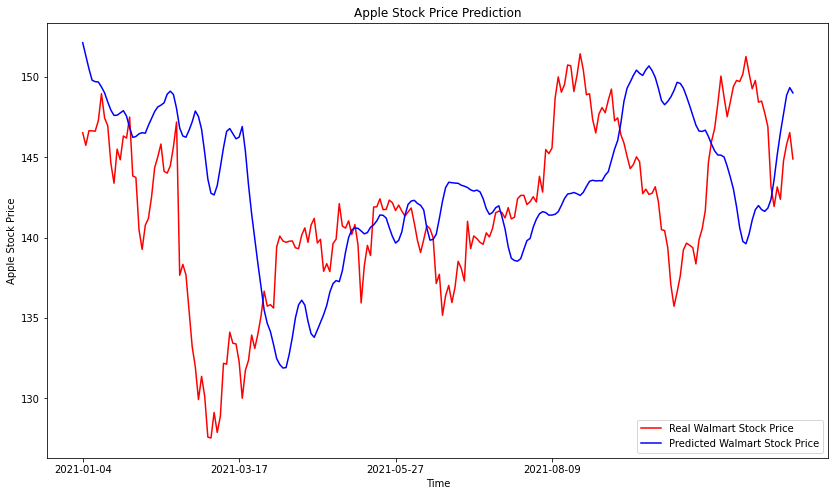

In [ ]:
# Visualising the results
plt.figure(figsize=(14,8))
plt.plot(df.loc[1282:, "Date"],dataset_test.values, color = "red", label = "Real Walmart Stock Price")
plt.plot(df.loc[1282:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Walmart Stock Price")
plt.xticks(np.arange(0,168,50))
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()


In [ ]:
print("Mean square error is ",sum((dataset_test.values-predicted_stock_price)**2)[0])

Mean square error is  9764.617188866228
